# Phase Planes

## Setup

Importage

In [1]:
# Generic stuff
import os,sys,glob, numpy as np, pandas as pd
from scipy.io import loadmat
from itertools import product
from scipy.interpolate import interp1d
from copy import deepcopy

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt

# CTWC model code
sys.path.append('../ctwc')
from ctwc_model import run_net_sim

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Define some variables

In [4]:
# 1-node weights & delays
weights_1N = np.array([[1.]])
delays_1N = np.array([[1.]])

Function to make phase plane figure

In [2]:
def run_and_make_figs(params):

    ssX_ts = {}
    ssX_pps = {}
    ssX_wps = {}
    res_ssX = {}

    I_os_1 = [0.0,0.5,1.0,1.5,2.0]



    for I_o in I_os_1:

        theseparams = deepcopy(params)
        
        theseparams['I_o'] = I_o
        
        res = run_net_sim(**theseparams)

        df = res[0].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_ts[I_o] = df

        df = res[1].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_wps[I_o] = df
    
        df = res[2].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_pps[I_o] = df
    
        res_ssX[I_o] = res
    

    df_ssX_ts = pd.concat(ssX_ts)
    df_ssX_ts.index.names = ['I_o', 't(ms)']
    df_ssX_ts.columns.names = ['variable']

    df_ssX_pps = pd.concat(ssX_pps)
    df_ssX_pps.index.names = ['I_o', 'freq(Hz)']
    df_ssX_pps.columns.names = ['variable']

    df_ssX_wps = pd.concat(ssX_wps)
    df_ssX_wps.index.names = ['I_o', 'freq(Hz)']
    df_ssX_wps.columns.names = ['variable']






    # FIG 2, PANEL A 


    # Get data
    df_ts = df_ssX_ts.loc[0]#1.5]
    df_ps = df_ssX_pps.loc[0]# 1.5]


    """
    1. Create figure
    """


    # Create subplots grid

    fig = plt.figure(figsize=(16,10))

    ## ax1 = central 3d figure
    ax1 = plt.subplot2grid((4, 4), (1, 1),colspan=3,rowspan=3,projection='3d')

    ## ax2-4 = orthogonal side views
    ax2 = plt.subplot2grid((4, 4), (1, 0))#,projection='3d')#, colspan=3)
    ax3 = plt.subplot2grid((4, 4), (2, 0))#,projection='3d')#, colspan=2)
    ax4 = plt.subplot2grid((4, 4), (3, 0))#,projection='3d')#, rowspan=2)

    ## ax 5-6 = time series and frequency plots 
    ax5 = plt.subplot2grid((4, 4), (0, 0),colspan=2)#,rowspan=3)
    ax6 = plt.subplot2grid((4, 4), (0, 2),colspan=2)#,projection='3d')#,rowspan=3)



    """
    2. Add central 3d plot 
    """

    line2, = ax1.plot(df_ts.e,#.loc[200:800],
                 df_ts.i,#.loc[200:800],
                 df_ts.th,#.loc[200:800],
                 c='teal')#, # alpha=0.5)#, # 0.05, marker='.',linestyle='')

    ax1.view_init(elev=23., azim=-80.)

    ax1.set_xlabel('\ne', fontweight='bold',fontsize=40)
    ax1.set_ylabel('\n i', fontweight='bold',fontsize=40)
    ax1.set_zlabel('\n s', fontweight='bold',fontsize=40)


    ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.zaxis.set_major_locator(plt.MaxNLocator(4))



    """
    3. Add orthogonal side views
    """

    # e vs. i
    df_ts.plot(x='e',y='i',c='teal',ax=ax2,legend=False)
    ax2.set_xlabel('e',fontweight='bold', fontsize=15)
    ax2.set_ylabel('i',fontweight='bold', fontsize=15)

    # e vs. th
    df_ts.plot(x='e',y='th',c='teal',ax=ax3,legend=False)
    ax3.set_xlabel('e',fontweight='bold', fontsize=15)
    ax3.set_ylabel('th',fontweight='bold', fontsize=15)

    # i vs. th
    df_ts.plot(x='i',y='th',c='teal',ax=ax4,legend=False)
    ax4.set_xlabel('i',fontweight='bold', fontsize=15)
    ax4.set_ylabel('th',fontweight='bold', fontsize=15)

    for a in [ax2,ax3,ax4]:
        a.xaxis.set_major_locator(plt.MaxNLocator(4))
        a.yaxis.set_major_locator(plt.MaxNLocator(4))



    """
    4. Add time series and frequency plots
    """


    df_ts['e'].loc[:500].plot(ax=ax5,c='teal',legend=False)
    ax5.set_xlabel('t(ms)', fontweight='bold')

    df_ps['e'].loc[:60].plot(ax=ax6,c='teal',legend=False)#,logy=True)
    ax6.set_xlabel('freq(Hz)', fontweight='bold')





    # Fine-tune subplot locations
    bb = ax1.get_position()
    ax1.set_position((bb.bounds[0],bb.bounds[1]-0.25,bb.bounds[2]+0.2,bb.bounds[3]+0.25))#*1.5))

 
    bb = ax2.get_position()
    ax2.set_position((bb.bounds[0],bb.bounds[1]-0.1,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax3.get_position()
    ax3.set_position((bb.bounds[0],bb.bounds[1]-0.15,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax4.get_position()
    ax4.set_position((bb.bounds[0],bb.bounds[1]-0.2,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))



    bb = ax5.get_position()
    ax5.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))

    bb = ax6.get_position()
    ax6.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))


    #plt.tight_layout()

    ax5.set_title('e population time series', fontsize=15,fontweight='bold')
    ax6.set_title('e population power spectrum', fontsize=15, fontweight='bold')

    tit = '                                             '
    tit+= '                                             '
    tit+='e-i-th state space trajectories \n'
    ax2.set_title(tit,fontweight='bold', fontsize=20)


    #plt.savefig('Fig2_A1.png', bbox_inches='tight', transparent=True, dpi=600)
    #plt.close()

    #Image('Fig2_A1.png')

    # FIG 2, PANEL A 


    # Get data
    df_ts = df_ssX_ts.loc[1.5]
    df_ps = df_ssX_pps.loc[1.5]


    """
    1. Create figure
    """


    # Create subplots grid

    fig = plt.figure(figsize=(16,10))

    ## ax1 = central 3d figure
    ax1 = plt.subplot2grid((4, 4), (1, 1),colspan=3,rowspan=3,projection='3d')

    ## ax2-4 = orthogonal side views
    ax2 = plt.subplot2grid((4, 4), (1, 0))#,projection='3d')#, colspan=3)
    ax3 = plt.subplot2grid((4, 4), (2, 0))#,projection='3d')#, colspan=2)
    ax4 = plt.subplot2grid((4, 4), (3, 0))#,projection='3d')#, rowspan=2)

    ## ax 5-6 = time series and frequency plots 
    ax5 = plt.subplot2grid((4, 4), (0, 0),colspan=2)#,rowspan=3)
    ax6 = plt.subplot2grid((4, 4), (0, 2),colspan=2)#,projection='3d')#,rowspan=3)



    """
    2. Add central 3d plot 
    """

    line2, = ax1.plot(df_ts.e,#.loc[200:800],
                 df_ts.i,#.loc[200:800],
                 df_ts.th,#.loc[200:800],
                 c='orange')#, # alpha=0.5)#, # 0.05, marker='.',linestyle='')

    ax1.view_init(elev=23., azim=-80.)

    ax1.set_xlabel('\ne', fontweight='bold',fontsize=40)
    ax1.set_ylabel('\n i', fontweight='bold',fontsize=40)
    ax1.set_zlabel('\n s', fontweight='bold',fontsize=40)


    ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.zaxis.set_major_locator(plt.MaxNLocator(4))



    """
    3. Add orthogonal side views
    """

    # e vs. i
    df_ts.plot(x='e',y='i',c='orange',ax=ax2,legend=False)
    ax2.set_xlabel('e',fontweight='bold', fontsize=15)
    ax2.set_ylabel('i',fontweight='bold', fontsize=15)

    # e vs. th
    df_ts.plot(x='e',y='th',c='orange',ax=ax3,legend=False)
    ax3.set_xlabel('e',fontweight='bold', fontsize=15)
    ax3.set_ylabel('th',fontweight='bold', fontsize=15)

    # i vs. th
    df_ts.plot(x='i',y='th',c='orange',ax=ax4,legend=False)
    ax4.set_xlabel('i',fontweight='bold', fontsize=15)
    ax4.set_ylabel('th',fontweight='bold', fontsize=15)

    for a in [ax2,ax3,ax4]:
        a.xaxis.set_major_locator(plt.MaxNLocator(4))
        a.yaxis.set_major_locator(plt.MaxNLocator(4))



    """
    4. Add time series and frequency plots
    """


    df_ts['e'].loc[:500].plot(ax=ax5,c='orange',legend=False)
    ax5.set_xlabel('t(ms)', fontweight='bold')
    
    df_ps['e'].loc[:60].plot(ax=ax6,c='orange',legend=False)#,logy=True)
    ax6.set_xlabel('freq(Hz)', fontweight='bold')





    # Fine-tune subplot locations
    bb = ax1.get_position()
    ax1.set_position((bb.bounds[0],bb.bounds[1]-0.25,bb.bounds[2]+0.2,bb.bounds[3]+0.25))#*1.5))

 
    bb = ax2.get_position()
    ax2.set_position((bb.bounds[0],bb.bounds[1]-0.1,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax3.get_position()
    ax3.set_position((bb.bounds[0],bb.bounds[1]-0.15,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax4.get_position()
    ax4.set_position((bb.bounds[0],bb.bounds[1]-0.2,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))



    bb = ax5.get_position()
    ax5.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))

    bb = ax6.get_position()
    ax6.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))

    ax5.set_title('e population time series', fontsize=15,fontweight='bold')
    ax6.set_title('e population power spectrum', fontsize=15, fontweight='bold')

    tit = '                                             '
    tit+= '                                             '
    tit+='e-i-th state space trajectories \n'
    ax2.set_title(tit,fontweight='bold', fontsize=20)


    # Create subplots grid

    fig = plt.figure(figsize=(18,8))

    axs = []

    for io_it,io in enumerate(I_os_1):

        df_ts = df_ssX_ts.loc[io]
        df_ps = df_ssX_pps.loc[io]
    
        ax_a = plt.subplot2grid((4, 5), (0, io_it),colspan=1,rowspan=2,projection='3d')
        ax_b = plt.subplot2grid((4, 5), (2, io_it),colspan=1,rowspan=1)#,projection='3d')
        ax_c = plt.subplot2grid((4, 5), (3, io_it),colspan=1,rowspan=1)#,projection='3d')

        line1, = ax_a.plot(df_ts.e,df_ts.i,df_ts.th,c='k',alpha=0.5)#, # 0.05, marker='.',linestyle='')
        ax_a.view_init(elev=23., azim=-80.)    
        ax_a.set_xlabel('\n e', fontweight='bold',fontsize=15)
        ax_a.set_ylabel('\n i', fontweight='bold',fontsize=15)
        ax_a.set_zlabel('\n s', fontweight='bold',fontsize=15)
        ax_a.xaxis.set_major_locator(plt.MaxNLocator(4))
        ax_a.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax_a.zaxis.set_major_locator(plt.MaxNLocator(4))


        df_ts['e'].loc[:500].plot(ax=ax_b,c='k')# ['b', 'r', 'g', 'o'])
        ax_b.set_xlabel('t(ms)', fontweight='bold')

    
        df_ps['e'].loc[:60].plot(ax=ax_c,c='k')# ['b', 'r', 'g', 'o'])
        ax_c.set_xlabel('Freq(Hz)', fontweight='bold')
    
        axs.append([ax_a,ax_b,ax_c])
    
    
        ax_a.set_title('I_o = %s' %io,fontsize=22)
    
    
    # Fine-tune subplot locations

    plt.tight_layout()


    for (ax_a,ax_b,ax_c) in axs:
    
        # Fine-tune subplot locations
        bb = ax_a.get_position()
        ax_a.set_position((bb.bounds[0]-0.02,bb.bounds[1],bb.bounds[2]+0.05,bb.bounds[3]))#*1.5))

 

    # plt.savefig('Fig2_B.png', bbox_inches='tight', transparent=True, dpi=600)
    # plt.close()

    #Image('Fig2_B.png')
    
    
    return 

## Make figure

In [5]:
T=1024*10

orig_ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

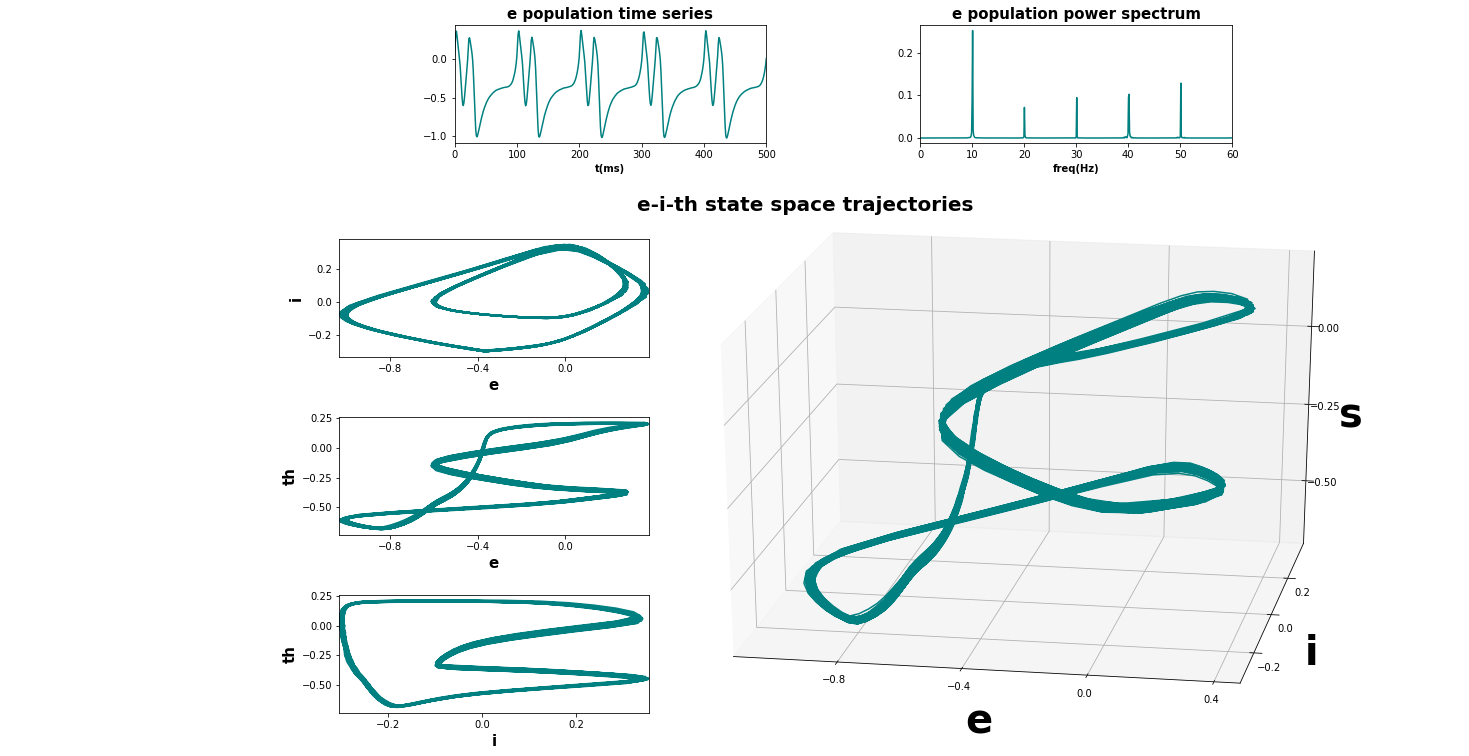

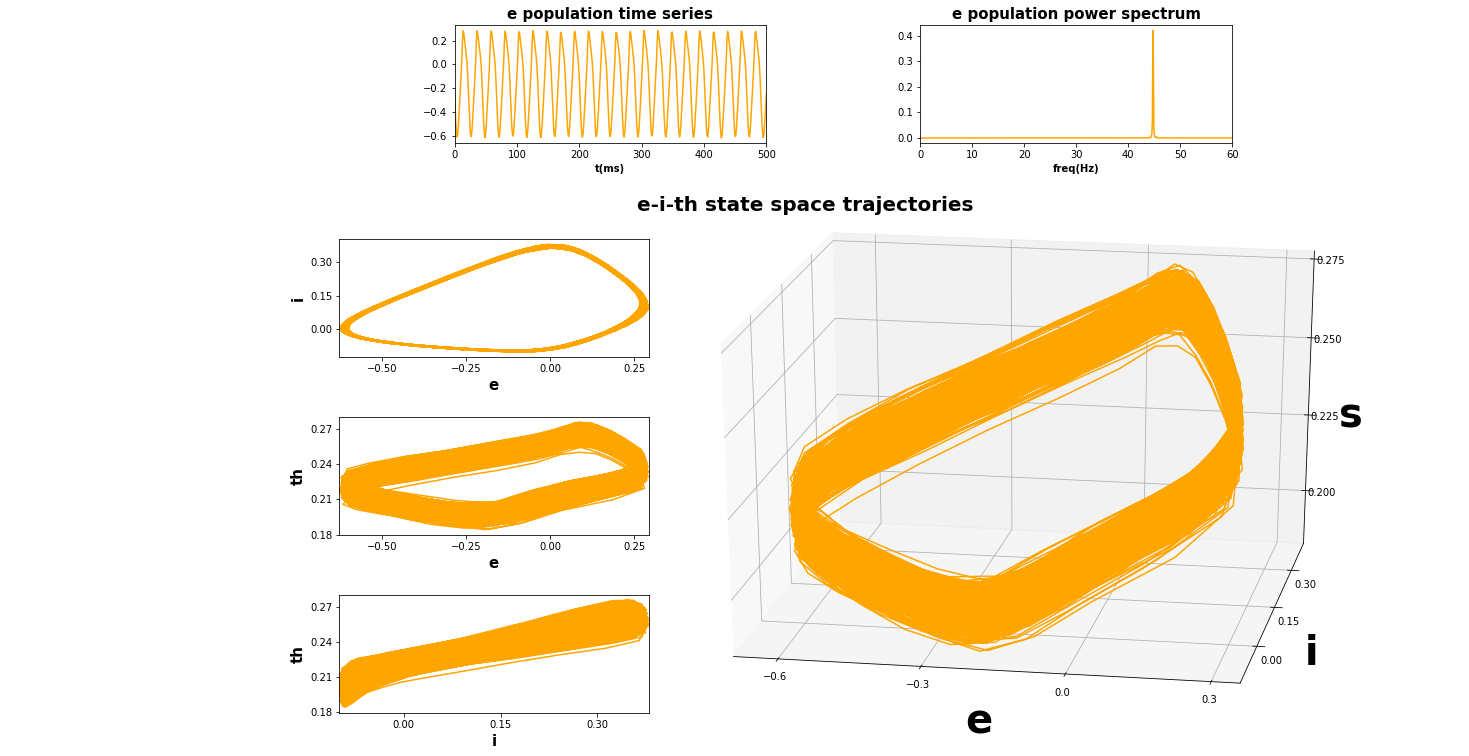

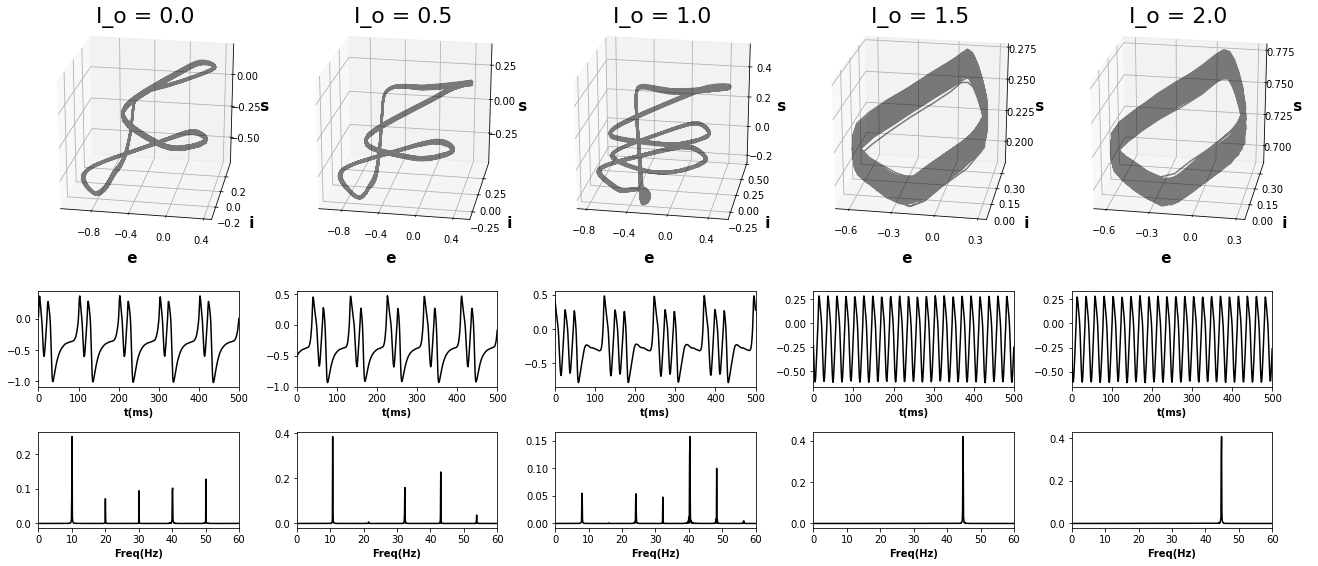

In [8]:
ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)